Use the wines dataset and the iris dataset to:


a) compare the kNN classifier with the support vector machine classifier in Python. Try and
use 10-fold cross validation, and record Accuracy, Precision, Recall, and F-Measure.


b) Which algorithm would you use for these two (toy) datasets and why?
Note: Both algorithms have a few parameters. Try to experiment and get better results by
changing in a systematic way their values in order to achieve better results. Note that it is OK
to focus only to the pararamtersthat were discussed in the lectures/notes/study material

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn import datasets
from sklearn import metrics


from sklearn. model_selection import cross_val_score
from sklearn.datasets import load_wine
wine_data = load_wine()

# Wine quality dataset

In [37]:
from sklearn.datasets import load_wine
wine_data = load_wine()

In [38]:
inputs = wine_data.data
outputs = wine_data.target


In [39]:
df = pd.DataFrame(inputs,columns=wine_data.feature_names)
df = pd.concat([df,pd.DataFrame(outputs)],axis=1)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  0    

In [41]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [42]:
df.rename(columns={0:'target'},inplace=True)

In [43]:
df.isnull().sum()


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<AxesSubplot:>

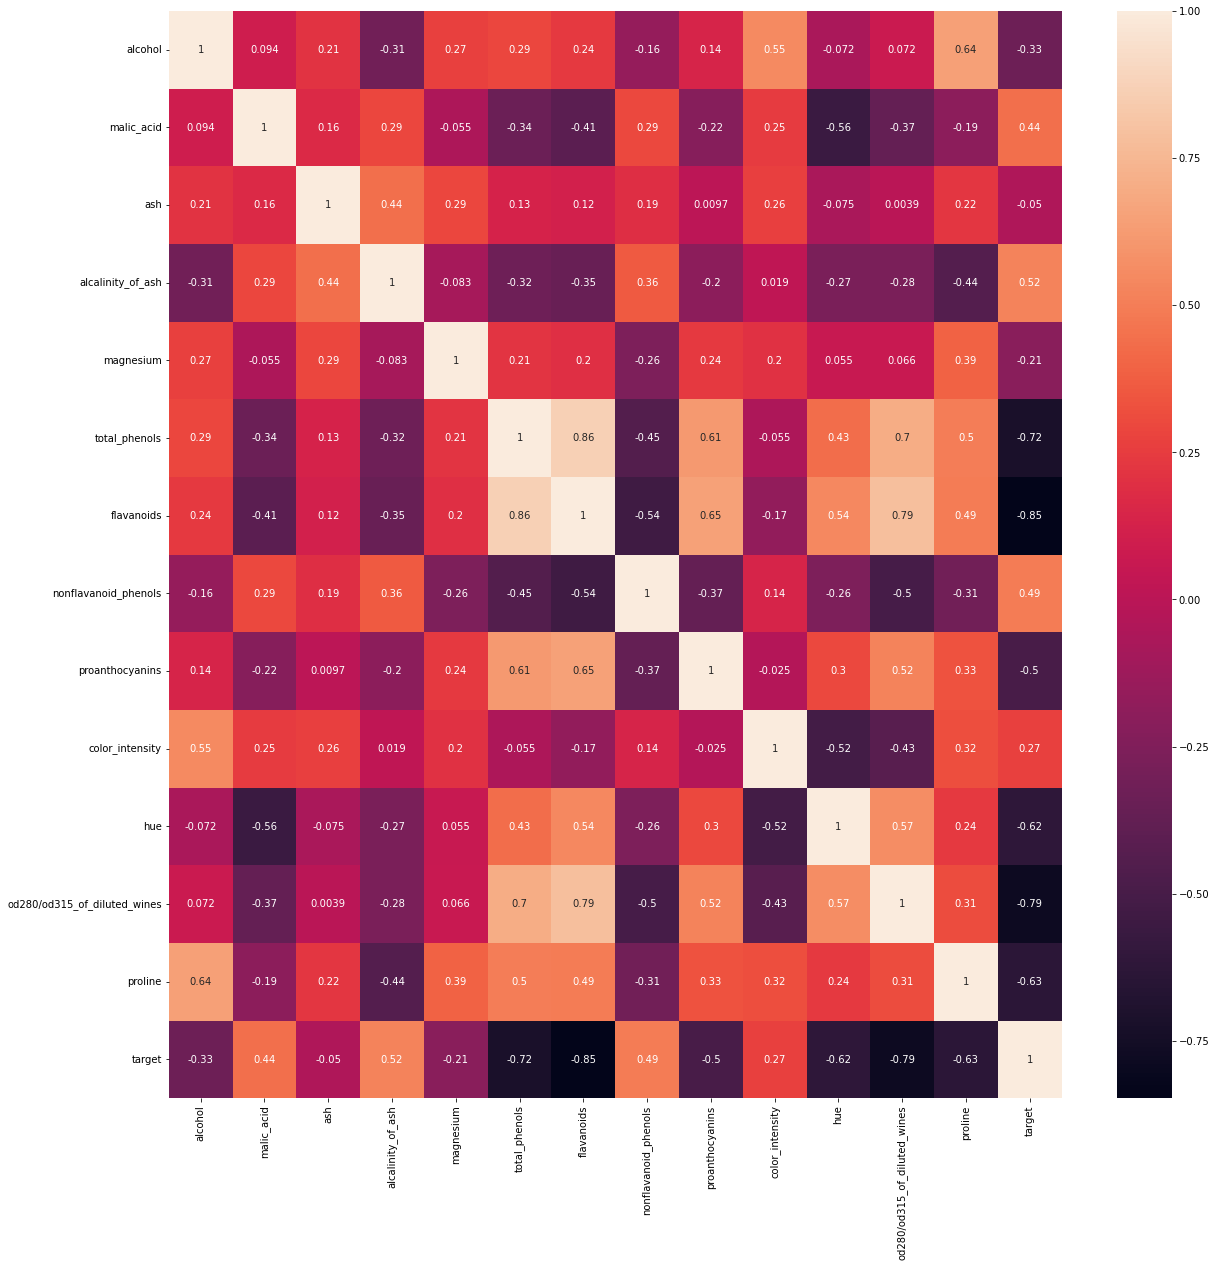

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

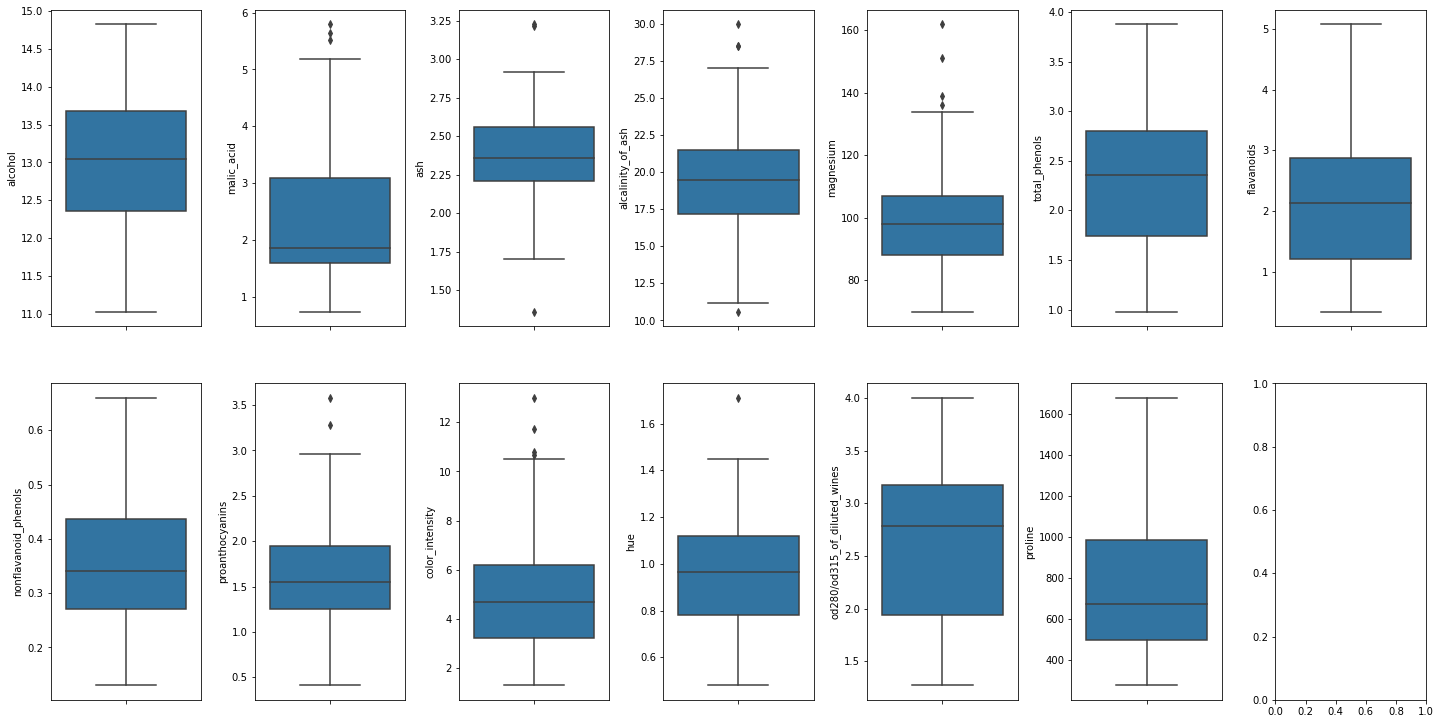

In [45]:
# create box plots to check for outliers
df_temp = df.drop(['target'],axis=1)

fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df_temp.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

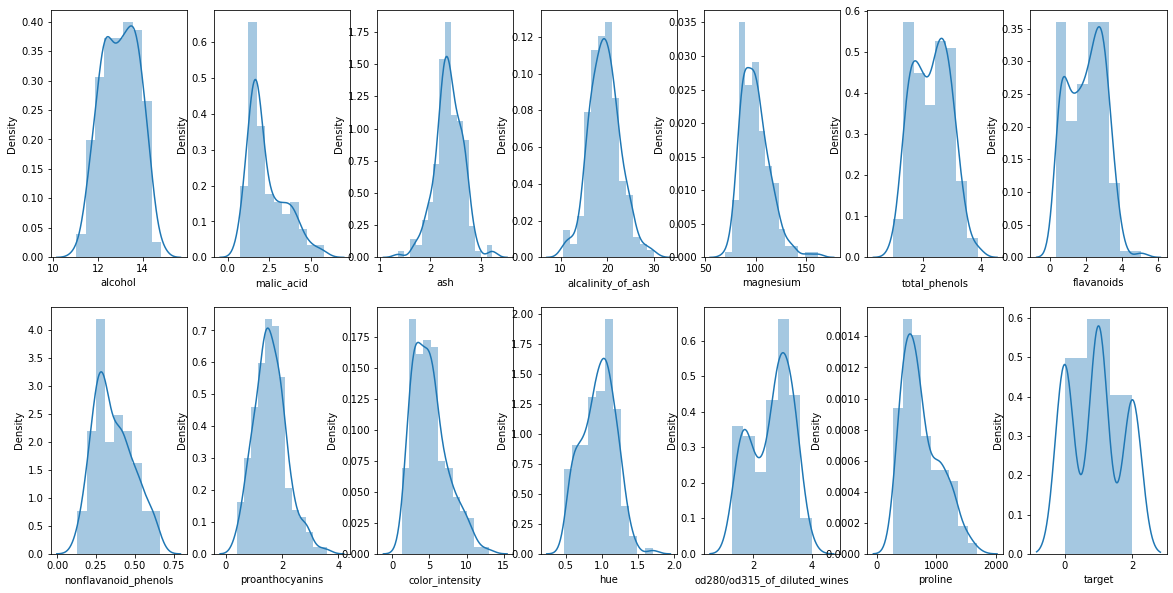

In [46]:
# create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col != 'type':
        sns.distplot(value, ax=ax[index])
        index += 1


# Data preprocessing

Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model. It is the first and crucial step while creating a machine learning model. When creating a machine learning project, it is not always a case that we come across the clean and formatted data.

In [47]:
x = df.drop('target',axis=1)
y = df['target']

In [48]:
features = wine_data.feature_names
print(len(features))

13


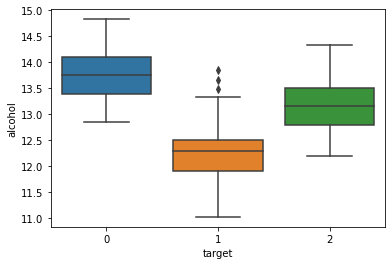

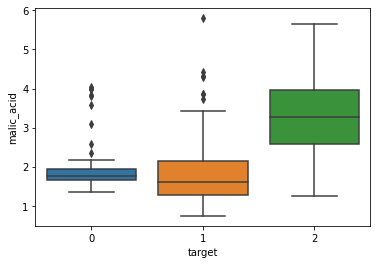

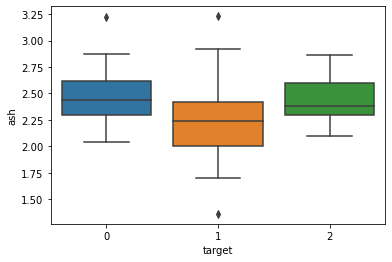

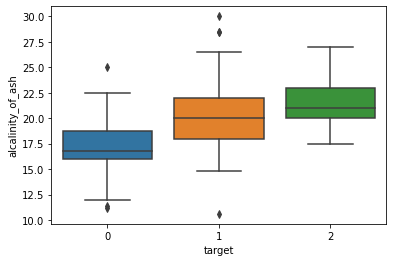

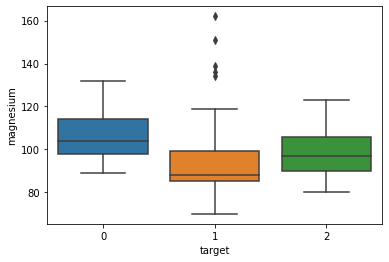

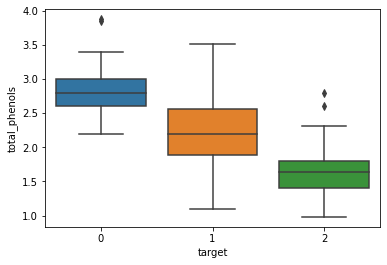

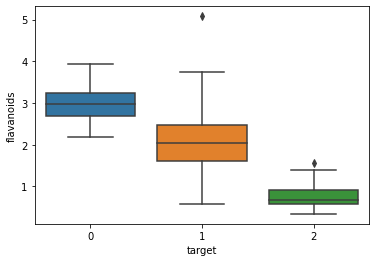

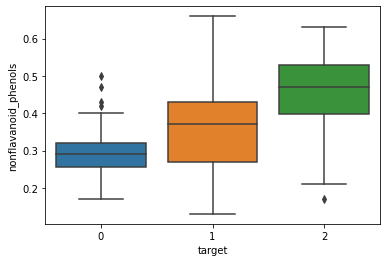

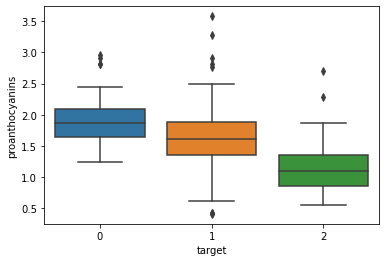

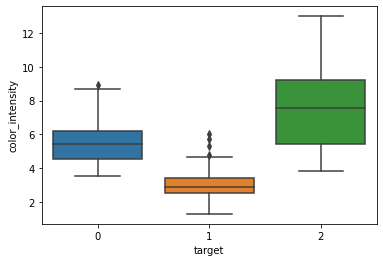

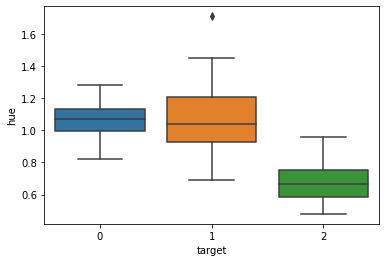

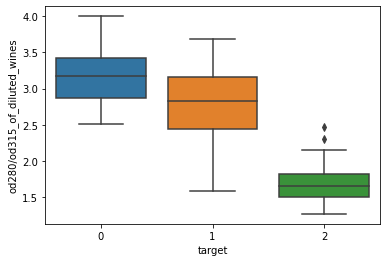

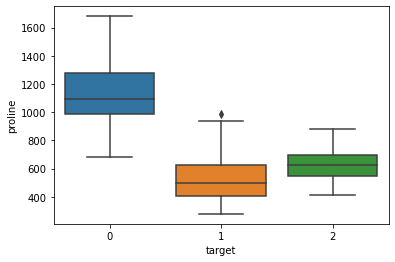

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(13):
    sns.boxplot(x=y,y=x.iloc[:,i])
    plt.ylabel(features[i])
    plt.show()

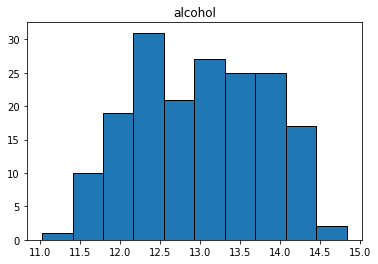

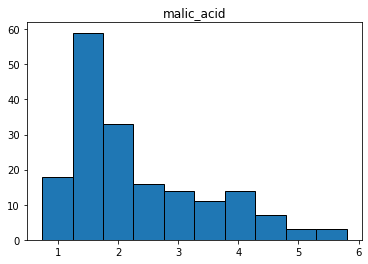

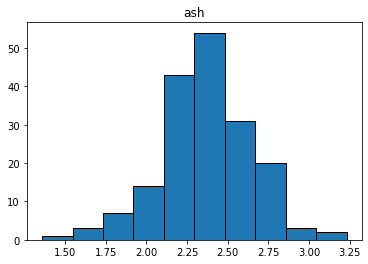

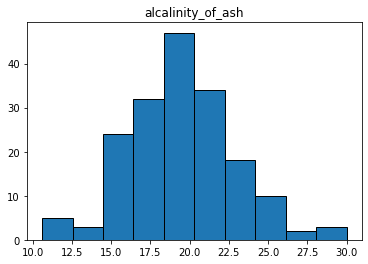

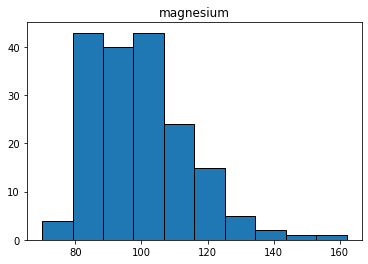

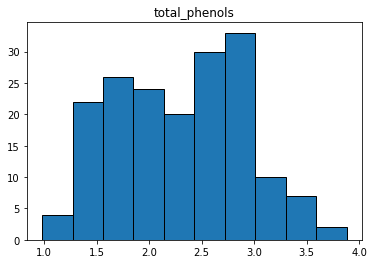

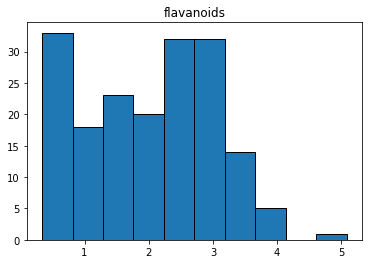

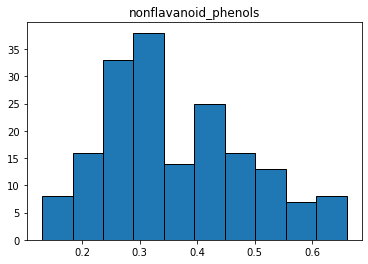

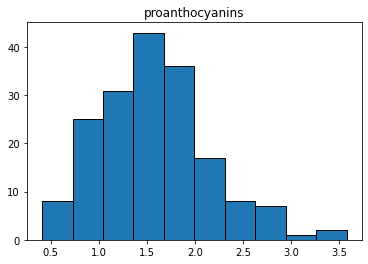

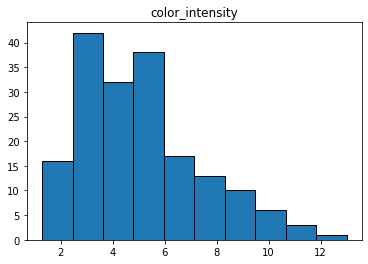

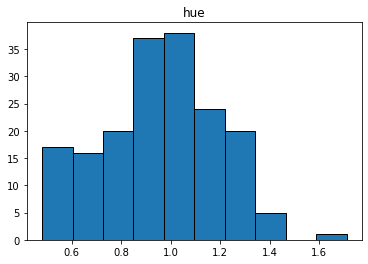

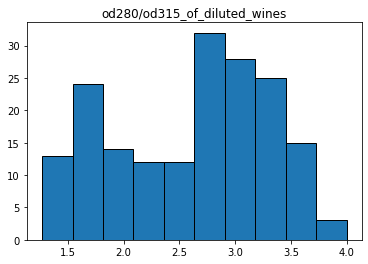

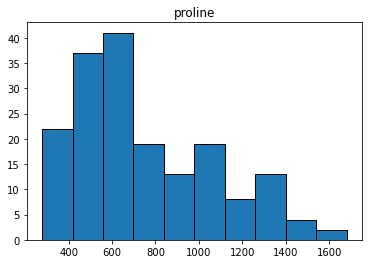

In [50]:
for i in range(13):
    plt.hist(x.iloc[:,i],edgecolor='black')
    plt.title(features[i])
    plt.show()
         

In [51]:
# create training and test datasets to train the algorithm and we set stratify=y to distribute the data properly
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=42,test_size=0.3)

In [52]:
cols = x_train.columns

# Beacuse SVM and KNN are distance based algorithms we need to perform feature scaling,we are going to use Standardazation for better algorithm performance in SVM

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
cols = x_train.columns
x_train_scaled = pd.DataFrame(x_train_scaled, columns=[cols])
x_test_scaled = pd.DataFrame(x_test_scaled, columns=[cols])

In [55]:
from sklearn.metrics import classification_report,accuracy_score

In [56]:
#run the algorithm with the deafult hyperparameters
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(x_train_scaled,y_train)

SVC()

In [57]:
y_pred_train = classifier.predict(x_train_scaled)
y_pred_test = classifier.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 1.0
Model accuracy in test set, 0.9814814814814815


In [58]:
##Run SVM with Linear kernel and c = 1
#run the algorithm with the deafult hyperparameters
from sklearn.svm import SVC
classifier_1 = SVC(kernel='linear',C=1)
classifier_1.fit(x_train_scaled,y_train)

SVC(C=1, kernel='linear')

In [59]:
y_pred_train = classifier_1.predict(x_train_scaled)
y_pred_test = classifier_1.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 1.0
Model accuracy in test set, 0.9629629629629629


In [60]:
##Run SVM with Linear kernel and c = 100

from sklearn.svm import SVC
classifier_2 = SVC(kernel='linear',C=100)
classifier_2.fit(x_train_scaled,y_train)

SVC(C=100, kernel='linear')

In [61]:
y_pred_train = classifier_2.predict(x_train_scaled)
y_pred_test = classifier_2.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 1.0
Model accuracy in test set, 0.9629629629629629


In [62]:
##Run SVM with Linear kernel and c = 1000
#run the algorithm with the deafult hyperparameters
from sklearn.svm import SVC
classifier_3 = SVC(kernel='linear',C=1000)
classifier_3.fit(x_train_scaled,y_train)

SVC(C=1000, kernel='linear')

In [63]:
y_pred_train = classifier_3.predict(x_train_scaled)
y_pred_test = classifier_3.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 1.0
Model accuracy in test set, 0.9629629629629629


In [64]:
y_pred_train = classifier.predict(x_train_scaled)
print(accuracy_score(y_train,y_pred_train))

1.0


In [65]:
y_pred_test=classifier.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_test))

0.9814814814814815


# Lets use different kernel

In [66]:
from sklearn.svm import SVC
classifier_rbf = SVC(kernel='rbf',C=5,gamma=0.1)
classifier_rbf.fit(x_train_scaled,y_train)

SVC(C=5, gamma=0.1)

In [67]:
y_pred = classifier_rbf.predict(x_train_scaled)
print(accuracy_score(y_train,y_pred))

1.0


In [70]:
y_pred_test = classifier_rbf.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred_test))

0.9814814814814815


In [69]:
##Using rbf we managed to improve our model for a litle bit

# It is better to perform hypermeter tuning using GRID SEARCH to find the optimal hyperparameters

In [74]:
from sklearn.model_selection import GridSearchCV
param = { 'C':[0.1,1,100,1000],'kernel':['rbf','poly','sigmoid','linear'],'degree':[1,2,3,4,5,6]}
grid_search = GridSearchCV(SVC(),param)
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['rbf', 'poly', 'sigmoid', 'linear']})

In [75]:
print(grid_search.best_params_)


{'C': 1, 'degree': 1, 'kernel': 'rbf'}


# Lets use these parameters

In [76]:
from sklearn.svm import SVC
classifier_grid = SVC(kernel='rbf',degree = 1,C=1)
classifier_grid.fit(x_train_scaled,y_train)

SVC(C=1, degree=1)

In [77]:
y_pred_train = classifier_grid.predict(x_train_scaled)
print(accuracy_score(y_train,y_pred_train))

1.0


In [87]:
y_pred_test = classifier_grid.predict(x_test_scaled)
print(accuracy_score(y_test,y_pred))

0.9814814814814815


In [88]:
##It seems that using the kernel = 'rbf' and C = 1 the our model regularizes well in test dataset

# Cross validation to check the accuracy




In [90]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
n_samples = x_train_scaled.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
score=cross_val_score(classifier_grid, x_train_scaled, y_train, cv=cv)
print("The cross validation score is ",np.mean(score))

The cross validation score is  0.9789473684210526


In [91]:
print(metrics.confusion_matrix(y_test,y_pred_test))
print(metrics.classification_report(y_test,y_pred_test))

[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



# Using KNN  For the same dataset

In [92]:
x_train_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.982686,-0.527640,0.173598,-1.087543,-0.727661,0.491455,0.791460,-0.596717,0.354587,0.255419,0.857462,0.437825,1.863180
1,0.957937,-0.745511,1.255504,0.839386,0.063252,1.131923,1.306553,-0.596717,1.343233,0.297587,1.032095,0.159563,1.749108
2,0.401078,-0.612894,1.777803,-1.235769,0.656436,0.491455,0.707363,-0.170491,-0.425924,-0.166255,0.595512,0.262081,0.429136
3,0.772317,-0.593949,-0.012937,-0.168547,0.392799,0.907759,1.243480,-1.193434,0.597412,0.803596,0.595512,0.408534,2.498722
4,-1.863482,0.107025,0.210905,0.098259,-0.266295,0.971806,0.822996,-0.340981,0.389276,-0.735516,-0.670576,1.155447,-0.401958


In [93]:
x_test_scaled.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.252582,0.069135,1.143582,-0.316772,0.063252,0.811689,1.296041,-0.511472,2.089053,0.289153,0.333563,0.833249,1.423189
1,-0.972507,-0.792874,0.621283,-0.198192,0.260980,-0.645374,-0.270263,0.767208,-0.998298,-0.862018,2.167209,-0.543413,-1.281940
2,1.527171,-0.660257,0.434748,-0.939318,0.524618,1.612273,2.021376,-0.340981,0.441310,1.562610,1.206727,0.320662,3.036488
3,1.366300,-0.129790,0.919740,-0.613222,1.381440,0.491455,0.528657,-0.426226,-0.616715,0.023498,0.464538,1.433709,1.781700
4,0.141211,-0.745511,-0.982921,-1.235769,-0.134476,0.171222,0.665315,-0.681962,-0.408579,-0.545762,0.988436,0.130273,0.885422


In [94]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [104]:
##from sklearn.neighbors import KNeighborsClassifier
##knn = KNeighborsClassifier()
##knn.fit(x_train,y_train)
##y_pred = knn.predict(x_train)
##y_pred_test = knn.predict(x_test)
##print("Accuracy Score for non scaled train set:",accuracy_score(y_train,y_pred))
##print("Accuracy Score for not scaled train set:",accuracy_score(y_test,y_pred_test))


##as we can can we trained the model without scaling the data perform very bad

Accuracy Score for non scaled train set: 0.8064516129032258
Accuracy Score for not scaled train set: 0.7222222222222222


In [95]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled,y_train)
y_pred = knn.predict(x_train_scaled)
y_pred_test = knn.predict(x_test_scaled)
print("Accuracy Score for train set:",accuracy_score(y_train,y_pred))
print("Accuracy Score for train set:",accuracy_score(y_test,y_pred_test))
##We used scaled data, Look how good the model performed

Accuracy Score for train set: 0.9838709677419355
Accuracy Score for train set: 0.9444444444444444


In [96]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54



# Check the accuracy across different values of n.

In [97]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_normalized,y_train)
    pred_i = knn.predict(x_test_normalized)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

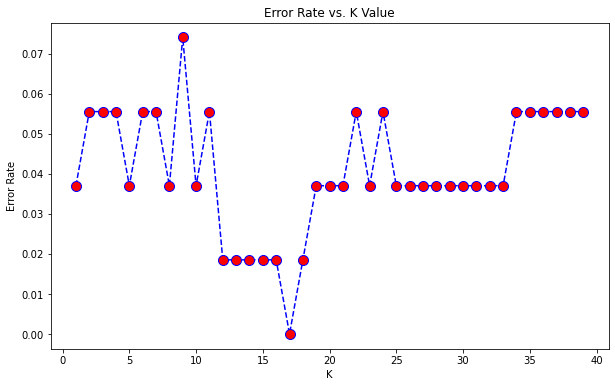

In [98]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [99]:
##Lets use 10 n_neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_2 = KNeighborsClassifier(n_neighbors=10)

knn_2.fit(x_train_scaled,y_train)
y_pred = knn_2.predict(x_train_scaled)
y_pred_test = knn_2.predict(x_test_scaled)
print("Accuracy Score for train set:",accuracy_score(y_train,y_pred))
print("Accuracy Score for test set:",accuracy_score(y_test,y_pred_test))

Accuracy Score for train set: 0.9758064516129032
Accuracy Score for test set: 0.9629629629629629


In [532]:
##10 is a good number which regularize very well in the test set

In [100]:
n_samples = x_train_scaled.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
score_knn=cross_val_score(knn_2, x_train_scaled, y_train, cv=cv)
print("The cross validation score is ",np.mean(score_knn))

The cross validation score is  0.9368421052631579


In [101]:
print("the cross validation score for KNN is " , np.array(score_knn).mean())
print("the cross validation score for Support vector machine is " , np.array(score).mean())

the cross validation score for KNN is  0.9368421052631579
the cross validation score for Support vector machine is  0.9789473684210526


In [105]:
##As we can see the SVM is slightly better

# Iris dataset

In [118]:
# Importing the necessary packages
import sklearn
from sklearn import datasets

# Load the iris data
iris = datasets.load_iris()

# Creating a variable for the feature data
X = iris.data


# Creating a variable for the target data
y = iris.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Feature training data lengthprint(x_train.shape)
print("X_train shape",x_train.shape)
print("x_Test shape ",x_test.shape)
print("y_Train shape ",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (112, 4)
x_Test shape  (38, 4)
y_Train shape  (112,)
y_test shape (38,)


In [119]:
##we perform fit transform only in training set and transform in test beacuse our scaler needs to have the weights from
##training set in both sets
from sklearn.preprocessing import StandardScaler
scaler_iris = StandardScaler()
x_train_scaled = scaler_iris.fit_transform(x_train)
x_test_scaled = scaler_iris.transform(x_test)

In [120]:
#run the algorithm with the deafult hyperparameters
classifier_iris = SVC()
classifier_iris.fit(x_train_scaled,y_train)

SVC()

In [121]:
y_pred_train = classifier_iris.predict(x_train_scaled)
y_pred_test = classifier_iris.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 0.9732142857142857
Model accuracy in test set, 0.9736842105263158


In [141]:
##Run SVM with Linear kernel and c = 1
classifier__iris_2 = SVC(kernel='linear',C=5)
classifier__iris_2.fit(x_train_scaled,y_train)
y_pred_train = classifier__iris_2.predict(x_train_scaled)
y_pred_test = classifier__iris_2.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 0.9732142857142857
Model accuracy in test set, 0.9736842105263158


In [143]:
##Run SVM with rbf kernel 
classifier__iris_3 = SVC(kernel='linear',C=100)
classifier__iris_3.fit(x_train_scaled,y_train)
y_pred_train = classifier__iris_3.predict(x_train_scaled)
y_pred_test = classifier__iris_3.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

##this model underfits

Model accuracy in train set, 0.9732142857142857
Model accuracy in test set, 1.0


In [144]:
##Run SVM with rbf kernel and c = 5
classifier__iris_4 = SVC(kernel='rbf',C=5)
classifier__iris_4.fit(x_train_scaled,y_train)
y_pred_train = classifier__iris_4.predict(x_train_scaled)
y_pred_test = classifier__iris_4.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 0.9821428571428571
Model accuracy in test set, 0.9736842105263158


In [145]:
##Run SVM with rbf kernel and c = 100
classifier__iris_5 = SVC(kernel='rbf',C=100)
classifier__iris_5.fit(x_train_scaled,y_train)
y_pred_train = classifier__iris_5.predict(x_train_scaled)
y_pred_test = classifier__iris_5.predict(x_test_scaled)
print("Model accuracy in train set,", accuracy_score(y_train,y_pred_train))
print("Model accuracy in test set,", accuracy_score(y_test,y_pred_test))

Model accuracy in train set, 0.9910714285714286
Model accuracy in test set, 0.9736842105263158


# Lets use the last model to perform our cross validation

In [157]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import ShuffleSplit
n_samples = x_train_scaled.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
score=cross_val_score(classifier__iris_5, x_train_scaled, y_train, cv=cv)
print("The cross validation score is ",np.mean(score))

The cross validation score is  0.9352941176470587


# KNN Algorithm

In [174]:
from sklearn.neighbors import KNeighborsClassifier
knn_iris = KNeighborsClassifier()
knn_iris.fit(x_train_scaled,y_train)
y_pred = knn_iris.predict(x_train_scaled)
y_pred_test = knn_iris.predict(x_test_scaled)
print("Accuracy Score for train set with default parameters:",accuracy_score(y_train,y_pred))
print("Accuracy Score for train set with default parameters:",accuracy_score(y_test,y_pred_test))
##We used scaled data, Look how good the model performed

Accuracy Score for train set with default parameters: 0.9553571428571429
Accuracy Score for train set with default parameters: 0.9736842105263158


In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn_iris_2 = KNeighborsClassifier(n_neighbors=5)
knn_iris_2.fit(x_train_scaled,y_train)
y_pred = knn_iris_2.predict(x_train_scaled)
y_pred_test = knn_iris.predict(x_test_scaled)
print("Accuracy Score for train set with n_neighbors=5:",accuracy_score(y_train,y_pred))
print("Accuracy Score for train set with n_neighbors=5:",accuracy_score(y_test,y_pred_test))


Accuracy Score for train set with n_neighbors=5: 0.9553571428571429
Accuracy Score for train set with n_neighbors=5: 0.9736842105263158


In [176]:
from sklearn.neighbors import KNeighborsClassifier
knn_iris_3 = KNeighborsClassifier(n_neighbors=10)
knn_iris_3.fit(x_train_scaled,y_train)
y_pred = knn_iris_2.predict(x_train_scaled)
y_pred_test = knn_iris.predict(x_test_scaled)
print("Accuracy Score for train set with n_neighbors=10:",accuracy_score(y_train,y_pred))
print("Accuracy Score for train set with n_neighbors=10:",accuracy_score(y_test,y_pred_test))


Accuracy Score for train set with n_neighbors=10: 0.9553571428571429
Accuracy Score for train set with n_neighbors=10: 0.9736842105263158


as we can see from cross validation results,the SVM performs better in the 2 datasets than KNN.in the last dataset the knn underfit.overall i would choose SVM.
